In [1]:
import matplotlib.pyplot as plt
from ezephys import pltools
import pickle
import numpy as np

In [57]:
def add_scalebar(x_units=None, y_units=None, anchor=(0.98, 0.02),
                 x_size=None, y_size=None, y_label_space=0.02, x_label_space=-0.02,
                 bar_space=0.06, x_on_left=True, linewidth=3, remove_frame=True,
                 omit_x=False, omit_y=False, round=True, usetex=True, ax=None, x_length_ax=None, y_length_ax=None):
    """Automagically add a set of x and y scalebars to a matplotlib plot.

    By default, scalebars are sized automatically based on x and y tick
    spacing.

    Arguments
    ---------
    x_units, y_units: str or None
        Units (e.g. mV, pA, ms) for x and y scalebars.
    anchor: pair of floats
        Bottom right of scale bar bbox (in axis coordinates).
    x_size, y_size: float or None
        Manually set size of x and y scalebars (or None for automatic sizing).
    x_label_space, y_label_space: float
        Offset for x and y scalebar labels (in axis units).
    bar_space: float >= 0.0
        Spacing between x and y scalebars (in axis units). Set to zero for the
        two bars to be joined at the corner.
    x_on_left: bool, default True
        Place x scalebar on left of y scalebar. Set to False to place on right
        instead.
    linewidth: float, default 3
        Thickness of scalebars.
    remove_frame: bool, default True
        Remove the frame, ticks, etc. from the axis object to which the
        scalebar is being added. True by default because the scalebars are
        assumed to be a replacement for the axes.
    omit_x, omit_y: bool, default False
        Skip drawing x or y scalebar.f
    round: bool, default True
        Round values to the nearest integer. Causes `100.0 pA` to be printed as
        `100 pA`.
    usetex: bool, default True
        Print numbers in LaTeX math mode. Set to False if LaTeX is not being
        used to render text, or `100 pA` will print as `$100$ pA`.
    ax: matplotlib.axes object, defaults to current axes
        Axis to which scalebars should be added.

    """
    # Basic input processing.

    if ax is None:
        ax = plt.gca()
        print('NONE')

    if x_units is None:
        x_units = ''
    if y_units is None:
        y_units = ''

    # Do y scalebar.
    if not omit_y:

        if y_size is None:
            y_span = ax.get_yticks()[:2]
            print('ax.get_yticks(): {}'.format(ax.get_yticks()))
            y_length = y_span[1] - y_span[0]
            print('y_span: {}'.format(y_span))
            y_span_ax = ax.transLimits.transform(
                np.array([[0, 0], y_span]).T)[:, 1]
            print('y_span_ax: {}'.format(y_span_ax))
        else:
            y_length = y_size
            print('y_span: {}'.format([0, y_size]))
            y_span_ax = ax.transLimits.transform(
                np.array([[0, 0], [0, y_size]]))[:, 1]
            print('y_span_ax: {}'.format(y_span_ax))
        if y_length_ax is None:
            y_length_ax = y_span_ax[1] - y_span_ax[0]
        print('y_length_ax: {}'.format(y_length_ax))


        if round:
            y_length = int(np.round(y_length))

        # y-scalebar label

        if y_label_space <= 0:
            horizontalalignment = 'left'
        else:
            horizontalalignment = 'right'

        if usetex:
            y_label_text = '${}${}'.format(y_length, y_units)
        else:
            y_label_text = '{}{}'.format(y_length, y_units)

        
        ax.text(
            anchor[0] - y_label_space, anchor[1] + y_length_ax / 2 + bar_space,
            y_label_text,
            verticalalignment='center', horizontalalignment=horizontalalignment,
            size='small', transform=ax.transAxes
        )

        # y scalebar
        ax.plot(
            [anchor[0], anchor[0]],
            [anchor[1] + bar_space, anchor[1] + y_length_ax + bar_space],
            'k-',
            linewidth=linewidth,
            clip_on=False,
            solid_capstyle='butt',
            transform=ax.transAxes
        )

    # Do x scalebar.
    if not omit_x:

        if x_size is None:
            print('x_size NONE')
            x_span = ax.get_xticks()[:2]
            x_length = x_span[1] - x_span[0]
            x_span_ax = ax.transLimits.transform(
                np.array([x_span, [0, 0]]).T)[:, 0]
            print('ax.get_xticks(): {}'.format(ax.get_xticks()))
            print('x_span: {}'.format(x_span))
            print('x_span_ax: {}'.format(x_span_ax))
        else:
            print('x_size NOT NONE')
            x_length = x_size
            x_span_ax = ax.transLimits.transform(
                np.array([[0, 0], [x_size, 0]]))[:, 0]
            print('x_span_ax: {}'.format(x_span_ax))
        if x_length_ax is None:
            x_length_ax = x_span_ax[1] - x_span_ax[0]
        print('x_length_ax: {}'.format(x_length_ax))
        if round:
            x_length = int(np.round(x_length))

        # x-scalebar label
        if x_label_space <= 0:
            verticalalignment = 'top'
        else:
            verticalalignment = 'bottom'

        if x_on_left:
            Xx_text_coord = anchor[0] - x_length_ax / 2 - bar_space
            Xx_bar_coords = [
                anchor[0] - x_length_ax - bar_space,
                anchor[0] - bar_space]
        else:
            Xx_text_coord = anchor[0] + x_length_ax / 2 + bar_space
            Xx_bar_coords = [
                anchor[0] + x_length_ax + bar_space,
                anchor[0] + bar_space]

        if usetex:
            x_label_text = '${}${}'.format(x_length, x_units)
        else:
            x_label_text = '{}{}'.format(x_length, x_units)

        ax.text(
            Xx_text_coord, anchor[1] + x_label_space,
            x_label_text,
            verticalalignment=verticalalignment, horizontalalignment='center',
            size='small', transform=ax.transAxes
        )

        # x scalebar
        ax.plot(
            Xx_bar_coords,
            [anchor[1], anchor[1]],
            'k-',
            linewidth=linewidth,
            clip_on=False,
            solid_capstyle='butt',
            transform=ax.transAxes
        )

    # if remove_frame:
    #     ax.axis('off')

In [15]:
# analysis for dataset1
dataset1_file = './datasets/dataset1.pickle'
with open(dataset1_file, "rb") as file:
    dataset1 = pickle.load(file)

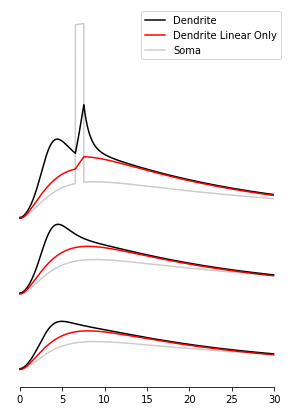

In [16]:
plt.figure(figsize=(5,7))
scale_y = 1
offset = scale_y * [0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
for i, trace in enumerate(dataset1):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    Vs_lin = trace['Vs_lin'][:t_end] 
    Vs_nl = trace['Vs_nl'][:t_end] 

    Vd = trace['Vd'][:t_end] 
    Vs = Vs_lin + 0.7 * Vs_nl
    Vd_lin = trace['Vd_lin'][:t_end] 
    time = trace['time'][:t_end]

    Vd_plt = plt.plot(time, offset[i] * i + Vd, 'k-')[0]
    Vd_lin_plt = plt.plot(time, offset[i] * i + Vd_lin, 'k-',  c='r')[0]
    Vs_plt = plt.plot(time, offset[i] * i + Vs, 'k-', alpha=0.2)[0]

# pltools.add_scalebar(x_units='ms', y_units='mV', anchor=(0.5, 0.7), bar_space=0)
Vs_plt.set_label('Soma')
Vd_plt.set_label('Dendrite')
Vd_lin_plt.set_label('Dendrite Linear Only')
pltools.hide_border('trl', trim=True)
plt.legend()
plt.savefig('./figures/recurrent1a.png')

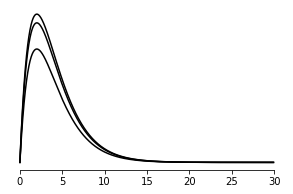

In [17]:
plt.figure(figsize=(5,3))
for i, trace in enumerate(dataset1):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    input = trace['input'][:t_end] 
    time = trace['time'][:t_end]

    plt.plot(time, offset[i] + input, 'k-')
pltools.hide_border('trl', trim=True)
plt.savefig('./figures/recurrent1b.png')

In [18]:
# analysis for dataset3
dataset3_file = './datasets/dataset3.pickle'
with open(dataset3_file, "rb") as file:
    dataset3 = pickle.load(file)

y_span: [0, 20]
y_span_ax: [0.04545455 7.05445195]
y_length_ax: 0.07008997407449803
x_size NOT NONE
x_span_ax: [0.04545455 0.10618206]
x_length_ax: 0.060727515637331426


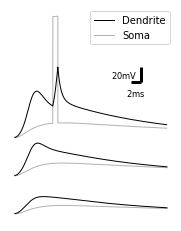

In [75]:
plt.figure(figsize=(3,4))
ax = plt.subplot(111)

scale_y = 1
offset = scale_y * [0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
for i, trace in enumerate(dataset3):
    t_end = 3000
    Vs_lin = trace['Vs_lin'][:t_end] 
    Vs_nl = trace['Vs_nl'][:t_end] 

    Vd = trace['Vd'][:t_end] 
    Vs = Vs_lin + 0.7 * Vs_nl
    Vd_lin = trace['Vd_lin'][:t_end] 
    time = trace['time'][:t_end]

    Vd_plt = ax.plot(time, offset[i] * i + Vd, 'k-', linewidth=1)[0]
    #Vd_lin_plt = plt.plot(time, offset[i] * i + Vd_lin, 'k-',  c='r', linewidth=0.7)[0]
    Vs_plt = ax.plot(time, offset[i] * i + Vs, 'k-', alpha=0.3, linewidth=1)[0]

y_scalebarlength = 0.2
x_scalebarlength = 2

y_span = abs(np.diff(ax.get_ylim()))[0]
x_span = abs(np.diff(ax.get_xlim()))[0]

y_length_ax = y_scalebarlength / y_span
x_length_ax = x_scalebarlength / x_span

add_scalebar(x_units='ms', y_units='mV', anchor=(0.8, 0.65), bar_space=0, round=False, x_size=2, y_size=20, ax=ax, x_length_ax=x_length_ax, y_length_ax=y_length_ax)
anchor = (0.6, 0.5)
y_length_ax = 1
x_length_ax = 1
y_label_space = 0.02
x_label_space = 0.02
bar_space = 0.06

Vs_plt.set_label('Soma')
Vd_plt.set_label('Dendrite')
Vd_lin_plt.set_label('Dendrite Linear Only')
pltools.hide_border('a', trim=True)
ax.legend()
plt.savefig('./figures/recurrent3a.svg', bbox_inches = "tight")
plt.show()

NONE
ax.get_yticks(): [0. 1. 2. 3.]
y_span: [0. 1.]
y_span_ax: [-0.21428571  0.30519481]
y_length_ax: 0.5194805194805194
x_size NOT NONE
x_span_ax: [0.04545455 0.10618206]
x_length_ax: 0.06072751563733143


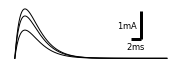

In [71]:
plt.figure(figsize=(3,1))
for i, trace in enumerate(dataset3):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    input = trace['input'][:t_end] 
    time = trace['time'][:t_end]

    plt.plot(time, offset[i] + input, 'k-', linewidth=1)

add_scalebar(x_units='ms', y_units='mA', anchor=(0.8, 0.4), bar_space=0, x_size=2, round=True)
pltools.hide_border('a', trim=True)
plt.savefig('./figures/recurrent3b.svg', bbox_inches = "tight")

In [86]:
# analysis for dataset4
dataset4_file = './datasets/dataset4.pickle'
with open(dataset4_file, "rb") as file:
    dataset4 =pickle.load(file)

y_span: [0, 20]
y_span_ax: [0.04545455 9.7728055 ]
y_length_ax: 0.09727350952996919
x_size NOT NONE
x_span_ax: [0.04545455 0.10618206]
x_length_ax: 0.060727515637331426


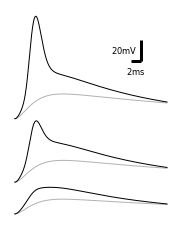

In [95]:
plt.figure(figsize=(3,4))
ax = plt.subplot(111)
scale_y = 1
offset = scale_y * [0.5, 0.3, 0.45, 0.5, 0.5, 1.0]
for i, trace in enumerate(dataset4):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    Vs_lin = trace['Vs_lin'][:t_end] 
    Vs_nl = trace['Vs_nl'][:t_end] 

    Vd = trace['Vd'][:t_end]
    Vs = Vs_lin + 0.7 * Vs_nl
    Vd_lin = trace['Vd_lin'][:t_end] 
    time = trace['time'][:t_end]

    Vd_plt = ax.plot(time, offset[i] * i + Vd, 'k-', linewidth=1)[0]
    #Vd_lin_plt = plt.plot(time, offset[i] * i + Vd_lin, 'k-',  c='r', linewidth=0.7)[0]
    Vs_plt = ax.plot(time, offset[i] * i + Vs, 'k-', alpha=0.3, linewidth=1)[0]

y_scalebarlength = 0.2
x_scalebarlength = 2

y_span = abs(np.diff(ax.get_ylim()))[0]
x_span = abs(np.diff(ax.get_xlim()))[0]

y_length_ax = y_scalebarlength / y_span
x_length_ax = x_scalebarlength / x_span

add_scalebar(x_units='ms', y_units='mV', anchor=(0.8, 0.75), bar_space=0, round=False, x_size=2, y_size=20, ax=ax, x_length_ax=x_length_ax, y_length_ax=y_length_ax)

Vd_lin_plt.set_label('Dendrite Linear Only')
pltools.hide_border('a', trim=True)
plt.savefig('./figures/recurrent3c.svg', bbox_inches = "tight")
plt.show()

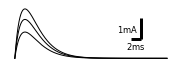

In [88]:
plt.figure(figsize=(3,1))
for i, trace in enumerate(dataset4):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    input = trace['input'][:t_end] 
    time = trace['time'][:t_end]

    plt.plot(time, offset[i] + input, 'k-', linewidth=1)
add_scalebar(x_units='ms', y_units='mA', anchor=(0.8, 0.4), bar_space=0, x_size=2, round=True)
pltools.hide_border('a', trim=True)
plt.savefig('./figures/recurrent3d.svg', bbox_inches = "tight")